In [173]:
%matplotlib inline
import numpy as np
import pandas as pd
np.random.seed(45)
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [287]:
indicator = pd.read_csv('indicator1.csv')
indicator.head()

,code,country,year,GDP_per_capita,Cost_start_Bus,Days_reg_bus,Bus_tax_rate,Hours_do_tax,Ease_Bus
0,AE,United Arab Emirates,2016,37622.207460,13.0,4,15.9,12.0,26
1,AF,Afghanistan,2016,561.778746,19.9,3,48.3,275.0,183
2,AG,Antigua and Barbuda,2016,14353.378810,9.4,9,41.9,207.0,113
3,AL,Albania,2016,4146.896250,10.1,5,36.5,261.0,58
4,AM,Armenia,2016,3606.152057,0.9,3,18.5,313.0,38


Drop the code column and year column

In [288]:
indicator.drop(indicator.columns[[0, 2]], axis=1, inplace=True)
indicator.head()

,country,GDP_per_capita,Cost_start_Bus,Days_reg_bus,Bus_tax_rate,Hours_do_tax,Ease_Bus
0,United Arab Emirates,37622.207460,13.0,4,15.9,12.0,26
1,Afghanistan,561.778746,19.9,3,48.3,275.0,183
2,Antigua and Barbuda,14353.378810,9.4,9,41.9,207.0,113
3,Albania,4146.896250,10.1,5,36.5,261.0,58
4,Armenia,3606.152057,0.9,3,18.5,313.0,38


In [289]:
indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
country           186 non-null object
GDP_per_capita    186 non-null float64
Cost_start_Bus    186 non-null float64
Days_reg_bus      186 non-null int64
Bus_tax_rate      186 non-null float64
Hours_do_tax      186 non-null float64
Ease_Bus          186 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 10.2+ KB


Use describe() method to show the summary statistics of numeric attributes.

In [290]:
indicator.describe()

,GDP_per_capita,Cost_start_Bus,Days_reg_bus,Bus_tax_rate,Hours_do_tax,Ease_Bus
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,12716.920054,25.294086,6.951613,40.782796,251.763441,95.306452
std,17685.942168,46.486582,3.167883,20.429026,206.249372,54.680474
min,285.727442,0.000000,1.000000,8.500000,12.000000,1.000000
25%,1721.056308,2.225000,5.000000,30.350000,147.250000,47.500000
50%,4839.407082,11.300000,7.000000,38.100000,209.000000,95.500000
75%,15052.379060,27.150000,9.000000,48.650000,275.750000,142.750000
max,102831.321500,422.400000,20.000000,216.500000,2038.000000,189.000000


The count, mean, min and max rows are self-explanatory. The std shows standard deviation. The 25%, 50% and 75% rows show the corresponding percentiles.

To get a feel of what type of the data we are dealing with, we plot a histogram for each numeric attribute.

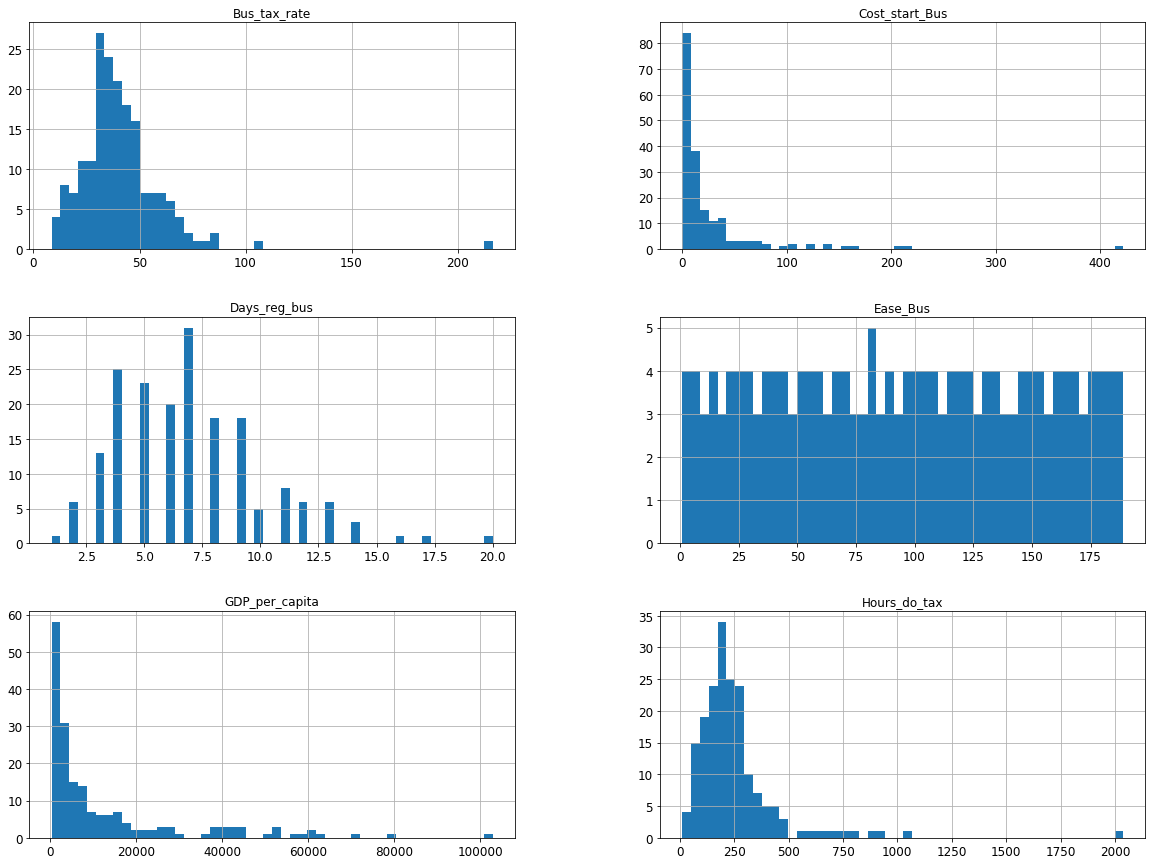

In [279]:
indicator.hist(bins=50, figsize=(20, 15))
plt.savefig('numeric_attributes.png')
plt.show()

Observations: 

These attributes have very different scales, we will need to apply feature scaling.

Many histogram are right skewed. This may make it harder for some machine learning algorithms to detect patterns. We will need to transform them to more normal distributions.

check for correlation between attributes.

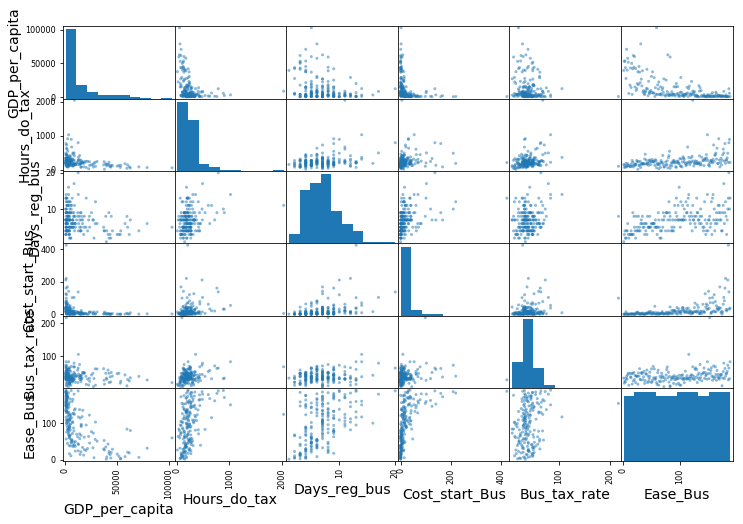

In [280]:
from pandas.plotting import scatter_matrix

attributes = ["GDP_per_capita", "Hours_do_tax", "Days_reg_bus", "Cost_start_Bus",
              "Bus_tax_rate", "Ease_Bus"]
scatter_matrix(indicator[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot.png")
plt.show()

It seems GDP per Capita has a negative correlation with Ease of doing business. The other attributes all have a positive correlation with Ease of doing business. Let's find the most promising attribute to predict the Ease of doing business.

In [248]:
from sklearn.linear_model import LinearRegression
X = indicator.drop(['country', 'Ease_Bus'], axis=1)
regressor = LinearRegression()
regressor.fit(X, indicator.Ease_Bus)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [249]:
print('Estimated intercept coefficient:', regressor.intercept_)

Estimated intercept coefficient: 59.9441729113


In [250]:
print('Number of coefficients:', len(regressor.coef_))

Number of coefficients: 5


In [251]:
pd.DataFrame(list(zip(X.columns, regressor.coef_)), columns = ['features', 'est_coef'])

,features,est_coef
0,GDP_per_capita,-0.001263
1,Cost_start_Bus,0.335086
2,Days_reg_bus,3.920190
3,Bus_tax_rate,0.175034
4,Hours_do_tax,0.033977


The most promising attribute to predict the "ease of doing business" is the "days spent to register a business", so let’s zoom in on their correlation scatterplot.

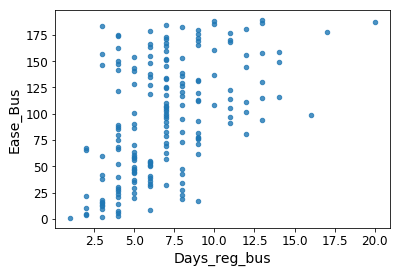

In [252]:
indicator.plot(kind="scatter", x="Days_reg_bus", y="Ease_Bus",
             alpha=0.8)
plt.savefig('scatter_plot.png')

The correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

Split the data into training and test

In [291]:
from sklearn.cross_validation import train_test_split
y = indicator.Ease_Bus

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Build a Linear Regression model

In [282]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [283]:
y_pred = regressor.predict(X_test)

In [284]:
regressor.score(X_test, y_test)

0.60703279859099579

So in our model, 60.7% of the variability in Y can be explained using X.

In [257]:
from sklearn.metrics import mean_squared_error
regressor_mse = mean_squared_error(y_pred, y_test)

import math
math.sqrt(regressor_mse)

33.58752374172286

So we are an average of 33.59 away from the ground true score on "ease of doing business" when making predictions on our test set.

The median score of "Ease of doing business" is 95, so a typical prediction error of 33.59 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select more features from Wordbank indicators(e.g., "getting credit", 'registering property" and so on). 

In [258]:
regressor.predict([[41096.157300, 5.0, 3, 58.7, 161.0]])

array([ 39.73396857])

In [259]:
indicator.loc[indicator['country'] == 'Belgium']

,country,GDP_per_capita,Cost_start_Bus,Days_reg_bus,Bus_tax_rate,Hours_do_tax,Ease_Bus
13,Belgium,41096.1573,5.0,3,58.7,161.0,42


In [261]:
regressor.predict([[42157.927990, 0.4, 2, 21.0, 131.0]])

array([ 26.10332477])

In [262]:
indicator.loc[indicator['country'] == 'Canada']

,country,GDP_per_capita,Cost_start_Bus,Days_reg_bus,Bus_tax_rate,Hours_do_tax,Ease_Bus
27,Canada,42157.92799,0.4,2,21.0,131.0,22


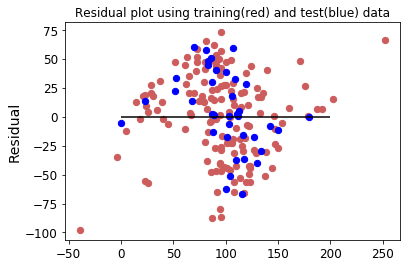

In [295]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, c='indianred', s=40)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, c='b', s=40)
plt.hlines(y=0, xmin=0, xmax=200)
plt.title('Residual plot using training(red) and test(blue) data')
plt.ylabel('Residual')
plt.savefig('residual_plot.png')